<a href="https://colab.research.google.com/github/ben8169/DeepLearning/blob/main/CNN_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from matplotlib import pyplot as plt

In [2]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print(device)

cuda


In [3]:
batch_size = 50
epoch_num = 15
learning_rate = 0.0001

In [5]:
train_data = datasets.MNIST(root = './data',
                            train = True,
                            download = True,
                            transform = transforms.ToTensor()
                            )
test_data = datasets.MNIST(root = './data',
                            train = False,
                            transform = transforms.ToTensor()
                            )

100%|██████████| 9912422/9912422 [00:00<00:00, 154276097.52it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 41499038.65it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 38649003.84it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 21897159.50it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



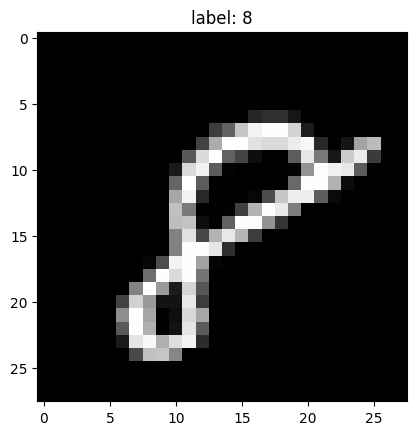

In [11]:
image, label = train_data[59999]

plt.imshow(image.squeeze().numpy(), cmap = 'gray')
plt.title('label: %s'%label)
plt.show()

In [25]:
train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                           batch_size = batch_size,
                                           shuffle = True
                                           )
test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                           batch_size = batch_size,
                                           shuffle = True
                                           )

first_batch = train_loader.__iter__().__next__()

print('{:15s} | {:<25s} | {}'.format('name','type','size'))
print('{:15s} | {:<25s} | {}'.format('Num of Batch','',len(train_loader)))
print('{:15s} | {:<25s} | {}'.format('first_batch',str(type(first_batch)),len(first_batch)))
print('{:15s} | {:<25s} | {}'.format('first_batch[0]',str(type(first_batch[0])),first_batch[0].shape))
print('{:15s} | {:<25s} | {}'.format('first_batch[1]',str(type(first_batch[1])),first_batch[1].shape))


name            | type                      | size
Num of Batch    |                           | 1200
first_batch     | <class 'list'>            | 2
first_batch[0]  | <class 'torch.Tensor'>    | torch.Size([50, 1, 28, 28])
first_batch[1]  | <class 'torch.Tensor'>    | torch.Size([50])


In [16]:
second_batch = train_loader.__iter__().__next__()

print('{:15s} | {:<25s} | {}'.format('name','type','size'))
print('{:15s} | {:<25s} | {}'.format('Num of Batch','',len(train_loader)))
print('{:15s} | {:<25s} | {}'.format('second_batch',str(type(second_batch)),len(second_batch)))
print('{:15s} | {:<25s} | {}'.format('second_batch[0]',str(type(second_batch[0])),second_batch[0].shape))
print('{:15s} | {:<25s} | {}'.format('second_batch[1]',str(type(second_batch[1])),second_batch[1].shape))


name            | type                      | size
Num of Batch    |                           | 1200
second_batch    | <class 'list'>            | 2
second_batch[0] | <class 'torch.Tensor'>    | torch.Size([50, 1, 28, 28])
second_batch[1] | <class 'torch.Tensor'>    | torch.Size([50])


In [17]:
first_batch[1], second_batch[1]

(tensor([9, 0, 5, 0, 4, 3, 6, 5, 6, 1, 7, 6, 7, 5, 9, 1, 9, 6, 3, 2, 7, 0, 2, 8,
         1, 0, 2, 8, 4, 3, 7, 9, 6, 8, 0, 9, 6, 8, 1, 7, 3, 9, 0, 1, 8, 8, 0, 8,
         1, 9]),
 tensor([7, 4, 4, 3, 2, 0, 8, 4, 7, 1, 7, 1, 6, 8, 2, 0, 7, 1, 1, 4, 1, 3, 5, 6,
         5, 2, 3, 4, 7, 1, 2, 9, 4, 2, 9, 0, 8, 6, 6, 4, 7, 7, 5, 3, 2, 7, 7, 2,
         9, 1]))

In [18]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, 3, 1)
    self.conv2 = nn.Conv2d(32, 64, 3, 1)
    self.dropout1 = nn.Dropout2d(0.25)
    self.dropout2 = nn.Dropout2d(0.5)
    self.fc1 = nn.Linear(9216, 128)
    self.fc2 = nn.Linear(128,10)

  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = F.max_pool2d(x, 2)
    x = self.dropout1(x)
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.dropout2(x)
    x = self.fc2(x)
    output = F.log_softmax(x, dim = 1)
    return output

In [19]:
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()

In [20]:
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [22]:
model.train()
i = 0

for epoch in range(epoch_num):
  for data,target in train_loader:
    data = data.to(device)
    target = target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    if i % 1000 == 0:
      print('Train Step: {} | Loss: {:.3f}'.format(i, loss.item()))
    i += 1

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Step: 0 | Loss: 2.289
Train Step: 1000 | Loss: 0.738
Train Step: 2000 | Loss: 0.289
Train Step: 3000 | Loss: 0.192
Train Step: 4000 | Loss: 0.106
Train Step: 5000 | Loss: 0.133
Train Step: 6000 | Loss: 0.066
Train Step: 7000 | Loss: 0.029
Train Step: 8000 | Loss: 0.066
Train Step: 9000 | Loss: 0.064
Train Step: 10000 | Loss: 0.056
Train Step: 11000 | Loss: 0.069
Train Step: 12000 | Loss: 0.017
Train Step: 13000 | Loss: 0.126
Train Step: 14000 | Loss: 0.063
Train Step: 15000 | Loss: 0.004
Train Step: 16000 | Loss: 0.006
Train Step: 17000 | Loss: 0.124


In [28]:
model.eval()
correct = 0
for data, target in test_loader:
  data = data.to(device)
  target = target.to(device)
  output = model(data)
  prediction = output.data.max(1)[1]
  correct += prediction.eq(target.data).sum()

print('Test set: Accuracy {:.2f}%'.format(100 * correct / len(test_loader.dataset)))

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Test set: Accuracy 98.94%


In [1]:
...

Ellipsis